In [2]:
# Import all the libraries that we shall be using
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
microarray = pd.read_csv("../microarray.csv")
patients = pd.read_csv("../patients.csv")
tmp = [i.split("_")[1].split("LYM")[1] for i in microarray.columns if "LYM" in i] #numeros associados ao LYM (pacientes)
tmp2 = patients["DLBCL sample (LYM number)"].tolist() #numero dos pacientes
tmp2 = [str(n).zfill(3) for n in tmp2]# passa para formato '00#'

patients["DLBCL sample (LYM number)"] = patients["DLBCL sample (LYM number)"].map(lambda x: str(x).zfill(3))# passa para formato '00#'

def get_good_columns(columns):
    new_col = []
    for col in columns:
        if col == "NAME" or col == "UNIQID":
            new_col.append(True)
        elif "LYM" in col:
            ah = col.split("_")[1].split("LYM")[1]
            if ah in tmp2:
                new_col.append(True)
            else:
                new_col.append(False)
        else:
            new_col.append(False)
    return new_col
def new_names(columns):
    new_col = []
    for col in columns:
        if col == "NAME" or col == "UNIQID":
            new_col.append(col)
        else:
            print(col)
            ah = col.split("_")[1].split("LYM")[1]
            new_col.append(ah)
    return new_col

#identify columns in microarray that have a correspondence on patients
microarray = microarray.loc[:,get_good_columns(microarray.columns)]
microarray.columns = new_names(microarray.columns) #Name, unique, 009, 186, etc

# Drop column of name of the genes, we will only keep the UNIQID.
microarray = microarray.drop("NAME", axis=1)
# We will use the transpose of the dataframe as it's easier.
microarray = microarray.T
microarray.columns = map(int,microarray.iloc[0])
microarray = microarray.drop("UNIQID") #pacientes nas linhas, genes nas colunas

print(microarray)

MLC94-46_LYM009_de novo untreated
MLC96-45_LYM186_de novo untreated
MLC91-27_LYM427_de novo untreated
MLC95-43_LYM095_de novo untreated
MLC91-28_LYM428_de novo untreated
MLC94-50_LYM004_de novo untreated
MLC95-46_LYM098_de novo untreated
MLC95-62_LYM114_de novo untreated
MLC95-85_LYM137_de novo untreated
MLC94-67_LYM027_de novo untreated
MLC94-100_LYM057_de novo untreated
MLC96-31_LYM173_de novo untreated
MLC91-33_LYM398_de novo untreated
MLC91-14_LYM432_de novo untreated
MLC96-22_LYM164_de novo untreated
MLC96-92_LYM233_de novo untreated
MLC95-57_LYM109_de novo untreated
MLC91-42_LYM409_de novo untreated
MLC92-53_LYM248_de novo untreated
MLC95-60_LYM112_de novo untreated
MLC95-84_LYM136_de novo untreated
MLC95-26_LYM079_de novo untreated
MLC96-35_LYM177_de novo untreated
MLC96-82_LYM223_de novo untreated
MLC95-18_LYM072_de novo untreated
MLC96-61_LYM202_de novo untreated
MLC94-59_LYM019_de novo untreated
MLC92-44_LYM279_de novo untreated
MLC92-68_LYM263_de novo untreated
MLC95-90_LYM1

In [4]:
microarray.shape

(240, 7292)

In [5]:
microarray.describe()

,27481,17013,24751,27498,27486,30984,17293,28329,27459,27482,...,32950,29670,33132,22148,24640,23934,32550,33340,32222,31518
count,239.000000,239.000000,237.000000,239.000000,239.000000,190.000000,238.000000,2.350000e+02,228.000000,227.000000,...,218.000000,198.000000,182.000000,166.000000,175.000000,170.000000,221.000000,174.000000,199.000000,197.000000
mean,0.030372,0.010008,0.070110,0.066030,0.013909,-0.011629,0.029364,-3.791660e-02,-0.004583,-0.025028,...,0.035290,-0.009122,-0.034200,0.049043,-0.001938,-0.059576,-0.013351,-0.100953,-0.062109,0.026377
std,0.691086,0.752202,0.822316,0.810186,0.847077,0.318706,0.801839,1.067485e+00,1.045402,1.154980,...,0.682358,0.670107,0.750611,0.627009,0.675390,0.673248,0.545656,0.616104,0.624517,0.682965
min,-1.565000,-1.998000,-2.027000,-2.052000,-2.431000,-1.068000,-2.608000,-2.953000e+00,-3.040000,-3.803000,...,-2.725000,-2.233000,-2.986000,-1.393000,-1.672000,-2.572000,-2.141000,-2.433000,-2.607000,-2.531000
25%,-0.402800,-0.517350,-0.436000,-0.507350,-0.549600,-0.184475,-0.495375,-7.511500e-01,-0.701350,-0.721250,...,-0.405625,-0.390600,-0.428250,-0.363075,-0.477800,-0.428950,-0.325400,-0.428150,-0.434050,-0.395500
50%,0.035000,0.000200,0.040250,0.063700,0.026400,-0.021850,0.022500,-4.430000e-08,0.000000,0.038000,...,-0.038600,-0.038700,-0.048500,-0.000300,-0.036450,-0.026950,-0.024400,-0.028000,-0.005600,-0.004700
75%,0.544900,0.559200,0.669400,0.665900,0.673850,0.178425,0.509200,7.133500e-01,0.737150,0.756300,...,0.474850,0.458450,0.326625,0.444425,0.382100,0.313725,0.331200,0.227175,0.361150,0.502500
max,2.134000,2.392000,2.243000,2.634000,2.532000,0.836100,2.310000,2.710000e+00,2.937000,3.106000,...,2.090000,1.860000,2.790000,1.562000,2.055000,2.352000,1.706000,1.772000,2.028000,2.980000


'\nVemos que há alguns genes que tem muitos missing values, vamos remover-los.\n'

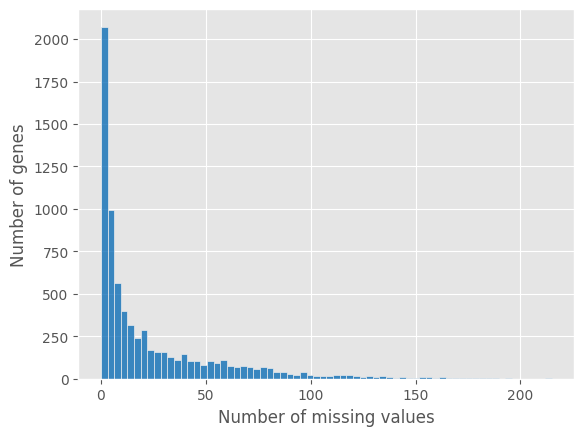

In [6]:
plot=sns.histplot(microarray.isna().sum(axis=0),color=(0, 0.4, 0.7))
plot.set(xlabel='Number of missing values', ylabel='Number of genes')

'''
Vemos que há alguns genes que tem muitos missing values, vamos remover-los.
'''

In [7]:
np.sum(np.array(microarray.isna().sum(axis=0)) <= 0.05 * microarray.shape[0])
np.array(microarray.isna().sum(axis=0)) <= 0.05 * microarray.shape[0]
# 4992 genes com menos de 10% de missing values.
# 4035 genes com menos de 5% de missing values.

array([ True,  True,  True, ..., False, False, False])

In [8]:
microarray = microarray.loc[:,np.array(microarray.isna().sum()) <= 0.05 * microarray.shape[0]]


In [9]:
microarray.shape

(240, 4035)

In [10]:
np.sum(np.array(microarray.isna().sum(axis=1)) <= 0.00 * microarray.shape[1])

0

# Missing Values

In [11]:
imputer = KNNImputer(n_neighbors=5, weights="distance") 

In [12]:
microarray.head()

,27481,17013,24751,27498,27486,17293,28329,27459,19248,24755,...,31167,32519,31123,24997,30000,32200,27161,26542,32423,26158
009,0.2340,0.4523,0.40500,0.1146,0.2491,0.6542,1.0120,0.4231,1.0950,0.0725,...,-0.1650,-0.7138,NaN,NaN,0.0557,-1.371000e+00,-0.8327,-0.8800,-0.7805,0.0068
186,-0.1725,-0.0387,-0.04135,-0.0242,-0.1028,0.4311,0.5086,-0.0509,0.0956,-1.2420,...,0.1979,-0.2756,0.5367,0.5262,0.7074,3.550000e-01,0.5283,-0.5022,1.5190,0.3876
427,0.2000,0.1747,0.19490,0.2227,0.1790,-0.1021,-0.1728,NaN,-0.3853,0.6280,...,1.0550,0.0716,NaN,0.0731,0.0039,-3.510000e-08,0.1478,0.2388,0.8681,0.7581
095,-0.1197,0.0038,-0.02125,-0.0705,-0.0755,0.2387,0.5814,0.3823,0.6819,0.5028,...,0.3820,0.7961,0.5036,-0.9024,-0.3313,-4.346000e-01,0.5324,0.3434,NaN,NaN
428,-0.3729,0.0047,-0.22200,-0.3373,-0.2808,1.3200,1.4470,1.6550,1.7290,0.2039,...,0.2176,0.1740,-0.3494,0.0242,0.1058,-1.035000e+00,-0.3124,0.8503,-0.1499,-0.9536


In [13]:
_ = imputer.fit_transform(microarray)

In [14]:
microarray_imputed = pd.DataFrame(imputer.fit_transform(microarray), columns=microarray.columns, index = microarray.index)

In [15]:
microarray_imputed

,27481,17013,24751,27498,27486,17293,28329,27459,19248,24755,...,31167,32519,31123,24997,30000,32200,27161,26542,32423,26158
009,0.2340,0.4523,0.40500,0.1146,0.2491,0.654200,1.0120,0.423100,1.0950,0.0725,...,-0.16500,-0.7138,-0.028730,-0.412527,0.0557,-1.371000e+00,-0.8327,-0.8800,-0.780500,0.006800
186,-0.1725,-0.0387,-0.04135,-0.0242,-0.1028,0.431100,0.5086,-0.050900,0.0956,-1.2420,...,0.19790,-0.2756,0.536700,0.526200,0.7074,3.550000e-01,0.5283,-0.5022,1.519000,0.387600
427,0.2000,0.1747,0.19490,0.2227,0.1790,-0.102100,-0.1728,0.657386,-0.3853,0.6280,...,1.05500,0.0716,-0.018207,0.073100,0.0039,-3.510000e-08,0.1478,0.2388,0.868100,0.758100
095,-0.1197,0.0038,-0.02125,-0.0705,-0.0755,0.238700,0.5814,0.382300,0.6819,0.5028,...,0.38200,0.7961,0.503600,-0.902400,-0.3313,-4.346000e-01,0.5324,0.3434,0.327193,-0.010489
428,-0.3729,0.0047,-0.22200,-0.3373,-0.2808,1.320000,1.4470,1.655000,1.7290,0.2039,...,0.21760,0.1740,-0.349400,0.024200,0.1058,-1.035000e+00,-0.3124,0.8503,-0.149900,-0.953600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,0.0018,-0.5639,-0.37140,-0.5052,-0.7152,-0.559300,-0.2135,-1.966000,-0.5037,0.8272,...,-0.31310,-0.7149,-0.490500,-0.577600,-0.1399,2.894000e-01,-1.2650,-0.2381,-0.838600,-0.480000
134,0.7495,0.8282,0.94780,1.0170,0.9563,-0.909100,-0.7339,-0.699400,-0.6802,1.4090,...,-0.08345,0.8157,0.768200,1.228000,0.1765,5.077000e-01,0.1948,0.5089,0.312500,0.251400
408,0.6615,0.6496,0.54660,0.6554,0.5176,0.072651,0.8818,0.921300,1.0260,1.0300,...,0.54090,-0.0378,-0.003950,0.252000,0.8438,4.577000e-01,0.2249,0.3678,0.007150,0.178500
022,0.2574,0.5143,0.64970,0.4211,0.3945,1.569000,1.5560,1.358000,0.9433,-0.2753,...,0.12830,-0.4758,-0.394900,-0.009200,-0.2164,-1.079000e+00,-0.9113,-0.5713,0.084050,0.211500


# Get train and test data.

In [26]:
one_hot = {"ABC" : 0, "GCB" : 1, "Type III" : 2}
Y = [one_hot[k] for k in patients["Subgroup"]]
print(len(Y))
index=patients.index


Y_2 = patients[['DLBCL sample (LYM number)','Subgroup']].copy()
Y_2['Subgroup']=[one_hot[k] for k in patients["Subgroup"]]

Y_2=Y_2.sort_values(by=['DLBCL sample (LYM number)'])
print(Y_2)

y_ordered= Y_2['Subgroup'].tolist()

240
    DLBCL sample (LYM number)  Subgroup
160                       001         2
0                         002         1
161                       003         1
1                         004         1
162                       005         0
..                        ...       ...
157                       431         0
158                       432         1
159                       433         1
238                       435         1
239                       439         2

[240 rows x 2 columns]


In [17]:
microarray_imputed.sort_index(inplace=True) #ordenado por numero do paciente
print(microarray_imputed.shape)
print(microarray_imputed.values)
np.savetxt("microarray_imputed.csv", microarray_imputed, delimiter=",")

(240, 4035)
[[-0.2808    -0.181     -0.2366    ... -0.2375    -0.08205    0.0964   ]
 [-0.221     -0.1786    -0.05025   ... -1.028      0.4922    -0.1864   ]
 [ 0.3423     0.4483     0.4866    ... -0.5224    -0.1331    -0.3157   ]
 ...
 [ 1.346      1.436      1.271     ...  0.2439     0.02115   -0.688    ]
 [ 0.1602    -0.0363    -0.3455    ... -0.2219    -0.3388    -0.2228164]
 [ 0.5603     0.4674     0.6376    ... -0.2767    -0.1021     0.5783   ]]


/Users/ineslucas/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:657: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


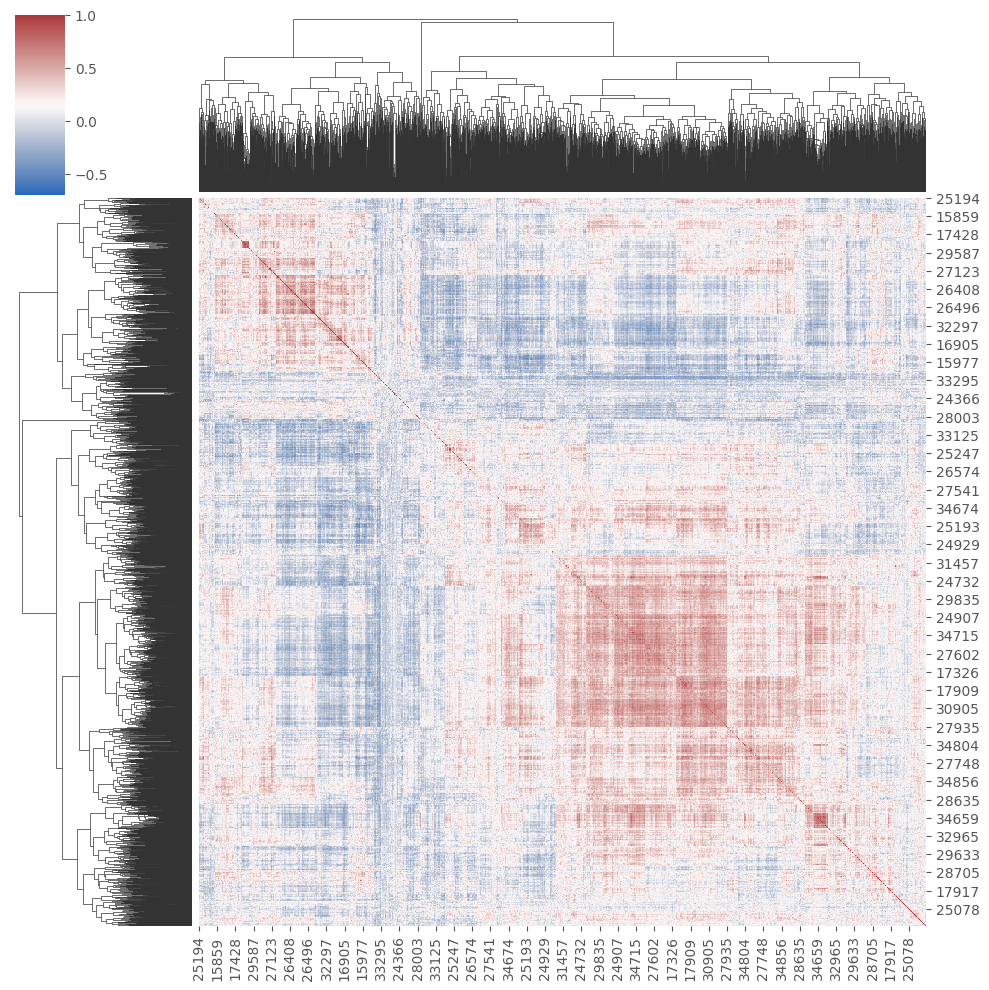

In [21]:
#clustermap
sns.clustermap(microarray_imputed.corr(),cmap='vlag');

# PCA

### PCA dos genes

(240, 62)
(62, 4035)


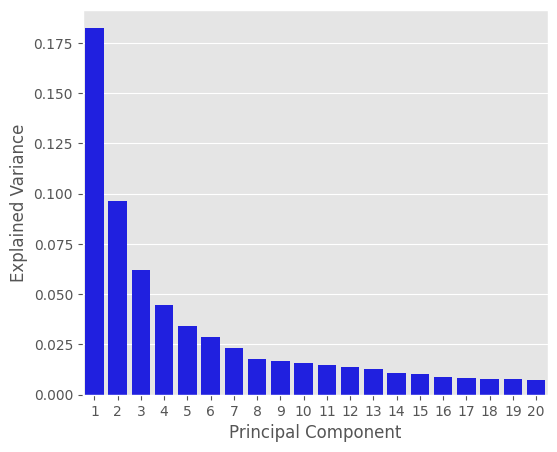

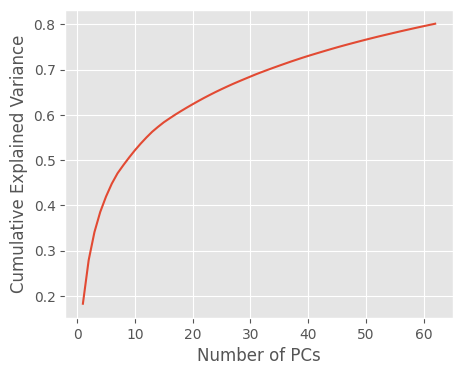

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits import mplot3d

#explciar o porque de normalizar a data
# Scaling the data using the minmax!!
sc = MinMaxScaler()
scaled = sc.fit_transform(microarray_imputed.values)

# Using the PCA on the normalized data
pca = PCA(n_components=0.80, svd_solver='full') # from the docs : "select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components"
decomp = pca.fit_transform(scaled)
print(decomp.shape)
#sns.scatterplot(decomp[:,0],decomp[:,1], hue=patients["Subgroup"], palette="Set2");

#explained variance
plt.figure(figsize=(6,5))
sns.barplot(x=(np.arange(pca.explained_variance_ratio_.shape[0])+1)[:20], 
            y=pca.explained_variance_ratio_[:20],color='Blue')
plt.ylabel('Explained Variance')
plt.xlabel('Principal Component')

#cumulative explained variance
plt.figure(figsize=(5,4))
sns.lineplot(x=np.arange(pca.explained_variance_ratio_.shape[0])+1, 
             y=pca.explained_variance_ratio_.cumsum())
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of PCs')

np.savetxt("decomp.csv", decomp, delimiter=",")
print(pca.components_.shape)

### PCA dos pacientes.

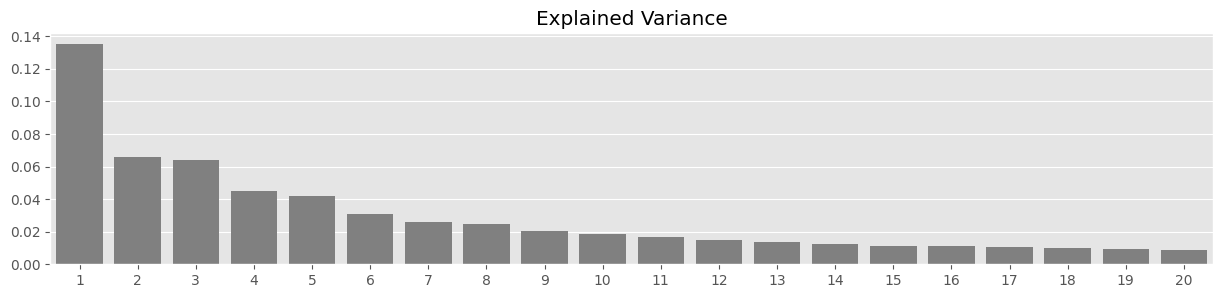

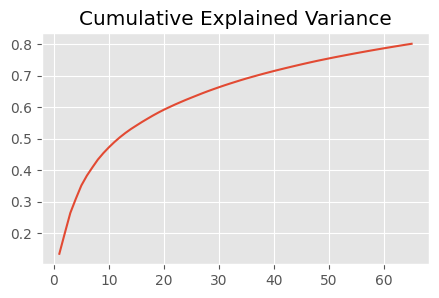

In [23]:
# Scaling the data using the minmax!!
sc = MinMaxScaler()
scaled_2 = sc.fit_transform(microarray_imputed.T.values)

# Using the PCA on the normalized data
pca_2 = PCA(n_components=0.80, svd_solver='full')
decomp_2 = pca_2.fit_transform(scaled_2)

#sns.scatterplot(decomp_2[:,0],decomp_2[:,1], hue=patients["Subgroup"], palette="Set2");

#explained variance
plt.figure(figsize=(15,3));
sns.barplot(x=(np.arange(pca_2.explained_variance_ratio_.shape[0])+1)[:20], 
            y=pca_2.explained_variance_ratio_[:20],color='Grey');
plt.title('Explained Variance');

#cumulative explained variance
plt.figure(figsize=(5,3));
sns.lineplot(x=np.arange(pca_2.explained_variance_ratio_.shape[0])+1, 
             y=pca_2.explained_variance_ratio_.cumsum());
plt.title('Cumulative Explained Variance');

# Clustering.

In [19]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering as agglo
from sklearn.metrics import silhouette_samples
from matplotlib import cm
from sklearn.cluster import SpectralClustering, BisectingKMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans

## Cluster de pessoas (os genes são as features) com PCA clássico

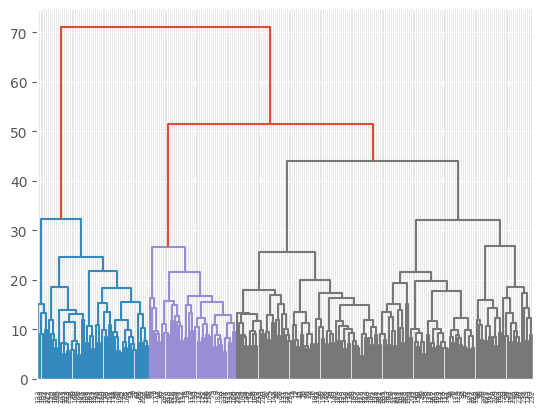

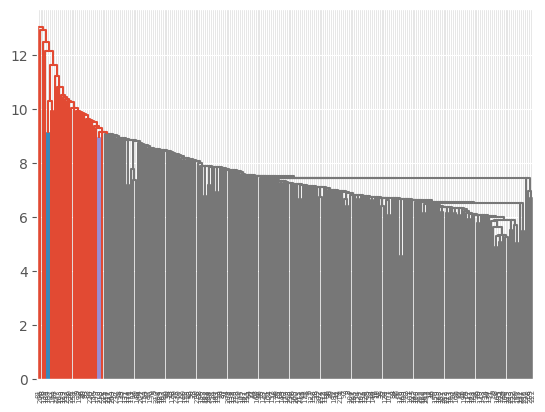

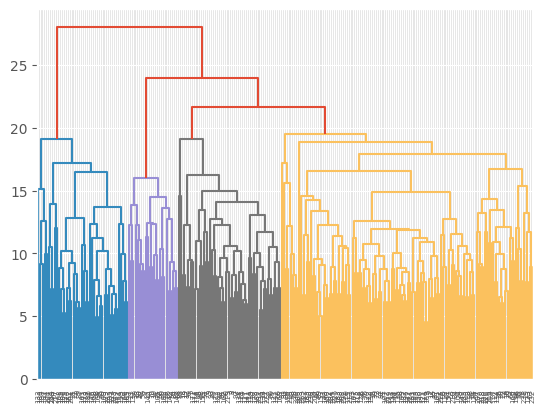

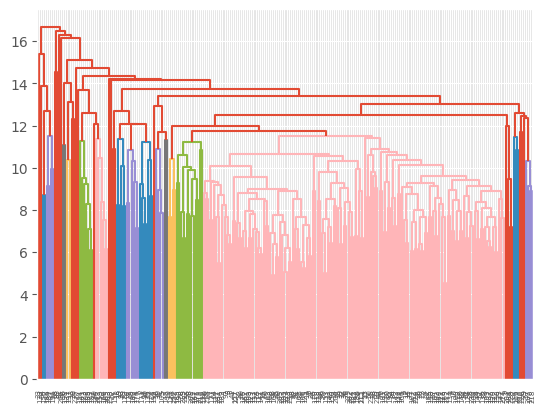

In [26]:
dend=dendrogram(linkage(decomp, method='ward'))
plt.show();

dend=dendrogram(linkage(decomp, method='single'))
plt.show();

dend=dendrogram(linkage(decomp, method='complete'))
plt.show();

dend=dendrogram(linkage(decomp, method='average'))
plt.show();

(240, 62)


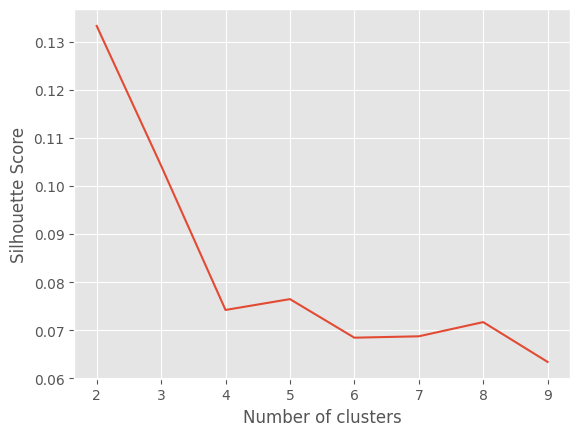

In [27]:
sil_scores = []
for i in range(2,10):
    ag=agglo(n_clusters=i, affinity='euclidean',linkage='ward')
    clusters=ag.fit_predict(decomp)
    sil_scores.append(silhouette_score(decomp, clusters))
    
fig = sns.lineplot(x=np.arange(2,10), y=sil_scores)
fig.set(ylabel='Silhouette Score', xlabel='Number of clusters');
print(decomp.shape)

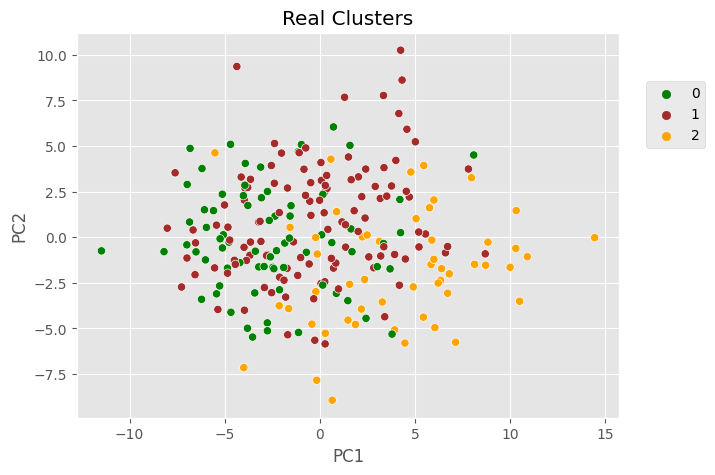

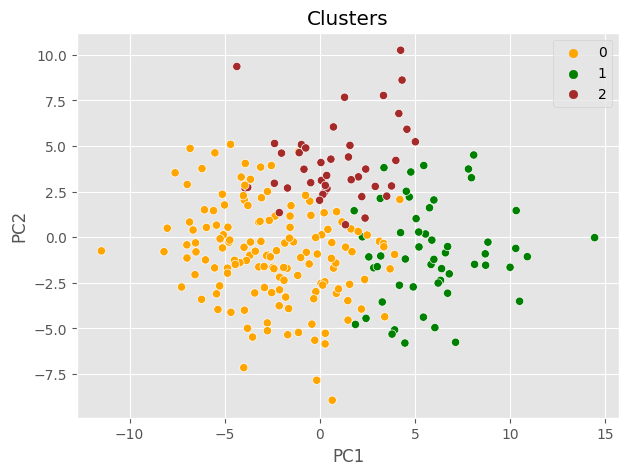

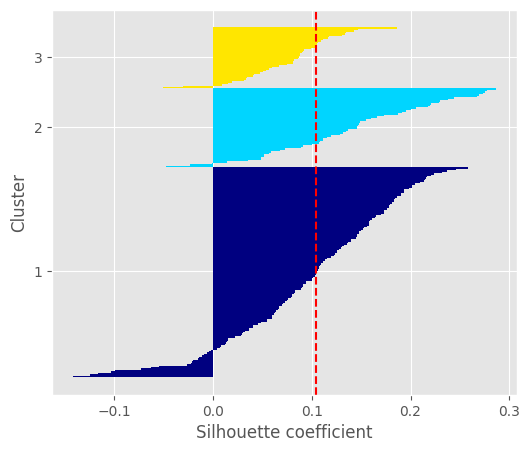

Ward's method accuracy 0.5541666666666667


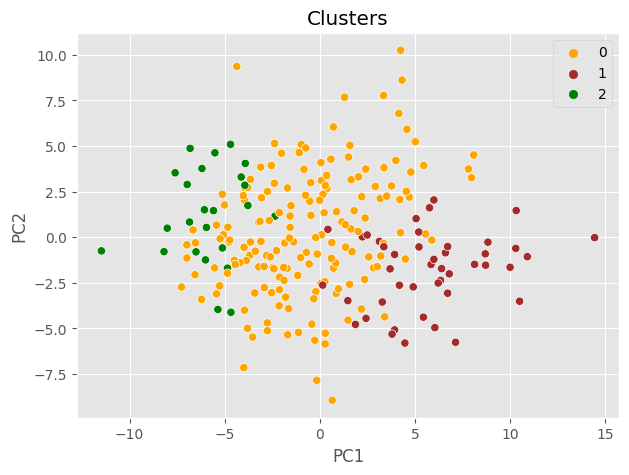

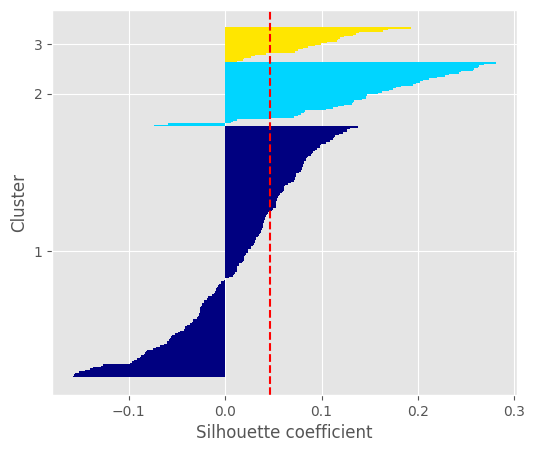

Complete linkage accuracy 0.6291666666666667


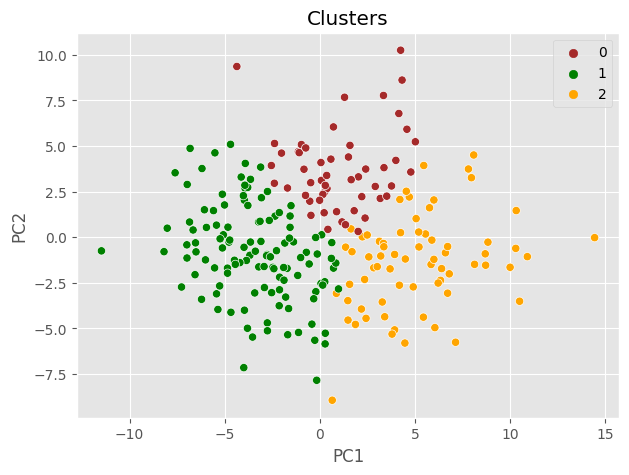

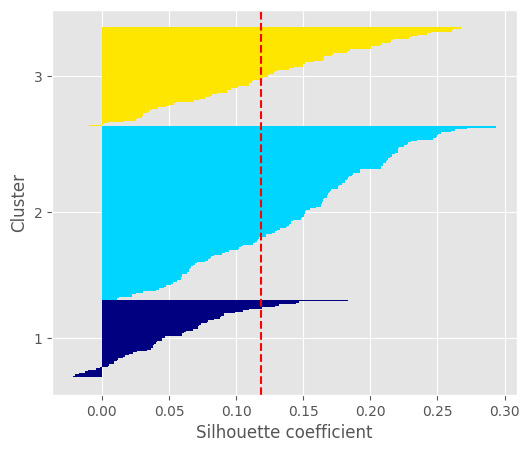

KMeans method accuracy 0.5791666666666667


In [33]:
plt.figure(figsize=(7,5))
sns.scatterplot(x = decomp[:,0], y = decomp[:,1], hue=y_ordered,palette=['green','brown', 'orange'])
plt.title('Real Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc=(1.05,0.7))

#Ward
ag=agglo(n_clusters=3, affinity='euclidean',linkage='ward')
clusters=ag.fit_predict(decomp)

plt.figure(figsize=(7,5))
sns.scatterplot(x = decomp[:,0], y = decomp[:,1], hue=clusters, palette=['orange','green','brown'])
plt.title('Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

#Graphing Silhouette
labels=np.unique(clusters)
n_clusters=labels.shape[0]
sils=silhouette_samples(decomp,clusters,metric='euclidean')
y_ax_lower, y_ax_upper=0, 0
yticks=[]
plt.figure(figsize=(6,5))
for i,c in enumerate(labels):
    cluster_sil=sils[clusters==c]
    cluster_sil.sort()
    y_ax_upper +=len(cluster_sil)
    color=cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            cluster_sil, height=1.0,
            edgecolor='none', color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower+=len(cluster_sil)
silhouette_avg=np.mean(sils)
plt.axvline(silhouette_avg,color='red', linestyle='--')
plt.yticks(yticks,labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.show();

#accuracy

correct=0

for i,j in enumerate(clusters):
    if(y_ordered[i]== 0 and j==0): correct +=1
    if(y_ordered[i]== 1 and j==2): correct +=1
    if(y_ordered[i]== 2 and j==1): correct +=1

accuracy= correct/len(clusters)
print("Ward's method accuracy", accuracy)

#Complete
ag=agglo(n_clusters=3, affinity='euclidean',linkage='complete')
clusters=ag.fit_predict(decomp)

plt.figure(figsize=(7,5))
sns.scatterplot(x = decomp[:,0], y = decomp[:,1], hue=clusters, palette=['orange','brown','green'])
plt.title('Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')


#Graphing Silhouette
labels=np.unique(clusters)
n_clusters=labels.shape[0]
sils=silhouette_samples(decomp,clusters,metric='euclidean')
y_ax_lower, y_ax_upper=0, 0
yticks=[]
plt.figure(figsize=(6,5))
for i,c in enumerate(labels):
    cluster_sil=sils[clusters==c]
    cluster_sil.sort()
    y_ax_upper +=len(cluster_sil)
    color=cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            cluster_sil, height=1.0,
            edgecolor='none', color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower+=len(cluster_sil)
silhouette_avg=np.mean(sils)
plt.axvline(silhouette_avg,color='red', linestyle='--')
plt.yticks(yticks,labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.show()

#accuracy

correct=0

for i,j in enumerate(clusters):
    if(y_ordered[i]== 0 and j==2): correct +=1
    if(y_ordered[i]== 1 and j==0): correct +=1
    if(y_ordered[i]== 2 and j==1): correct +=1

accuracy= correct/len(clusters)
print("Complete linkage accuracy", accuracy)

#Kmeans
kmeans = KMeans(n_clusters=3, random_state=0)
clusters=kmeans.fit_predict(decomp)

plt.figure(figsize=(7,5))
sns.scatterplot(x = decomp[:,0], y = decomp[:,1], hue=clusters, palette=['brown','green','orange'])
plt.title('Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')


#Graphing Silhouette
labels=np.unique(clusters)
n_clusters=labels.shape[0]
sils=silhouette_samples(decomp,clusters,metric='euclidean')
y_ax_lower, y_ax_upper=0, 0
yticks=[]
plt.figure(figsize=(6,5))
for i,c in enumerate(labels):
    cluster_sil=sils[clusters==c]
    cluster_sil.sort()
    y_ax_upper +=len(cluster_sil)
    color=cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            cluster_sil, height=1.0,
            edgecolor='none', color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower+=len(cluster_sil)
silhouette_avg=np.mean(sils)
plt.axvline(silhouette_avg,color='red', linestyle='--')
plt.yticks(yticks,labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.show()

#accuracy
correct=0

for i,j in enumerate(clusters):
    if(y_ordered[i]== 0 and j==1): correct +=1
    if(y_ordered[i]== 1 and j==0): correct +=1
    if(y_ordered[i]== 2 and j==2): correct +=1

accuracy= correct/len(clusters)
print("KMeans method accuracy", accuracy)

## Cluster de pessoas (os genes são as features) sem PCA

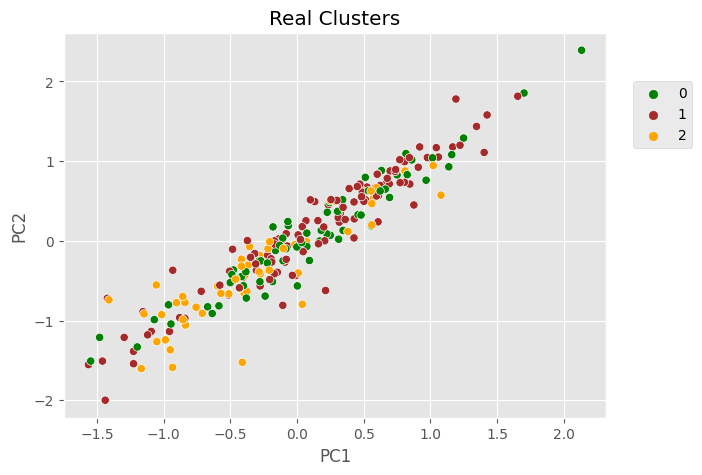

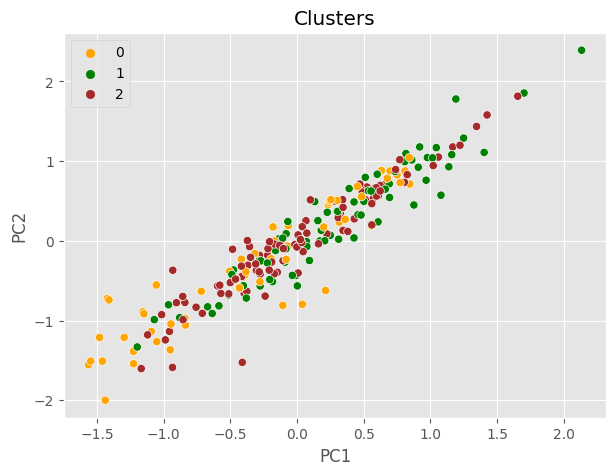

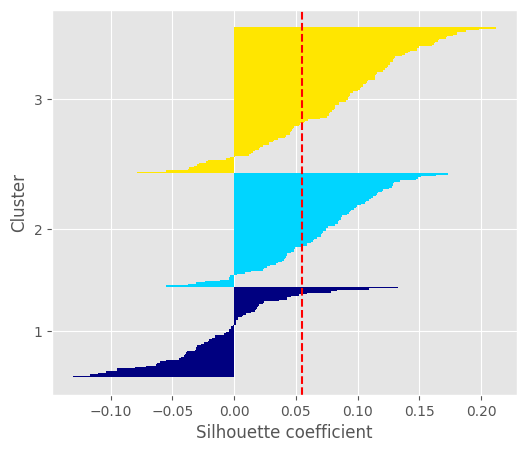

Ward's method accuracy 0.5


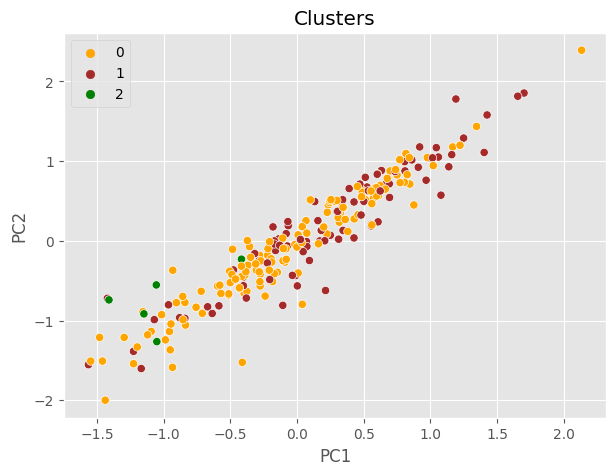

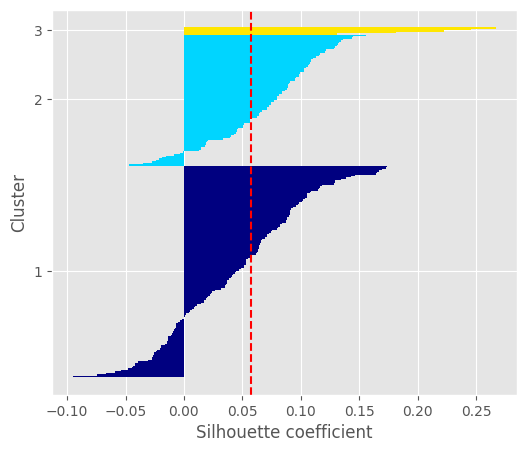

Complete Linkage method accuracy 0.49166666666666664


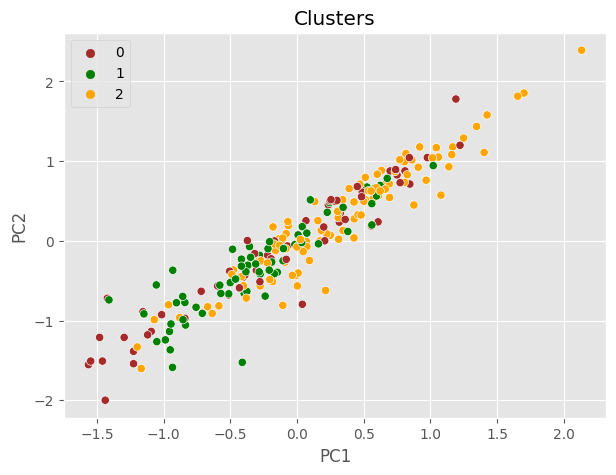

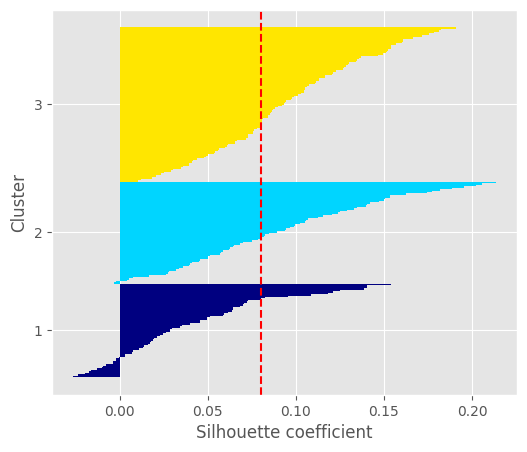

Kmeans method accuracy 0.5958333333333333


In [25]:
#Clusters without PCA

plt.figure(figsize=(7,5))
sns.scatterplot(x = microarray_imputed.values[:,0], y = microarray_imputed.values[:,1], hue=y_ordered,palette=['green','brown', 'orange'])
plt.title('Real Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc=(1.05,0.7))

#Ward
ag=agglo(n_clusters=3, affinity='euclidean',linkage='ward')
clusters=ag.fit_predict(microarray_imputed.values)

plt.figure(figsize=(7,5))
sns.scatterplot(x = microarray_imputed.values[:,0], y = microarray_imputed.values[:,1], hue=clusters, palette=['orange','green','brown'])
plt.title('Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

#Graphing Silhouette
labels=np.unique(clusters)
n_clusters=labels.shape[0]
sils=silhouette_samples(microarray_imputed.values,clusters,metric='euclidean')
y_ax_lower, y_ax_upper=0, 0
yticks=[]
plt.figure(figsize=(6,5))
for i,c in enumerate(labels):
    cluster_sil=sils[clusters==c]
    cluster_sil.sort()
    y_ax_upper +=len(cluster_sil)
    color=cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            cluster_sil, height=1.0,
            edgecolor='none', color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower+=len(cluster_sil)
silhouette_avg=np.mean(sils)
plt.axvline(silhouette_avg,color='red', linestyle='--')
plt.yticks(yticks,labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.show();

#accuracy

correct=0

for i,j in enumerate(clusters):
    if(y_ordered[i]== 0 and j==1): correct +=1
    if(y_ordered[i]== 1 and j==0): correct +=1
    if(y_ordered[i]== 2 and j==2): correct +=1

accuracy= correct/len(clusters)
print("Ward's method accuracy", accuracy)

#Complete
ag=agglo(n_clusters=3, affinity='euclidean',linkage='complete')
clusters=ag.fit_predict(microarray_imputed.values)

plt.figure(figsize=(7,5))
sns.scatterplot(x = microarray_imputed.values[:,0], y = microarray_imputed.values[:,1], hue=clusters, palette=['orange','brown','green'])
plt.title('Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')


#Graphing Silhouette
labels=np.unique(clusters)
n_clusters=labels.shape[0]
sils=silhouette_samples(microarray_imputed.values,clusters,metric='euclidean')
y_ax_lower, y_ax_upper=0, 0
yticks=[]
plt.figure(figsize=(6,5))
for i,c in enumerate(labels):
    cluster_sil=sils[clusters==c]
    cluster_sil.sort()
    y_ax_upper +=len(cluster_sil)
    color=cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            cluster_sil, height=1.0,
            edgecolor='none', color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower+=len(cluster_sil)
silhouette_avg=np.mean(sils)
plt.axvline(silhouette_avg,color='red', linestyle='--')
plt.yticks(yticks,labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.show()

#accuracy

correct=0

for i,j in enumerate(clusters):
    if(y_ordered[i]== 0 and j==1): correct +=1
    if(y_ordered[i]== 1 and j==0): correct +=1
    if(y_ordered[i]== 2 and j==2): correct +=1

accuracy= correct/len(clusters)
print("Complete Linkage method accuracy", accuracy)


#Kmeans
kmeans = KMeans(n_clusters=3, random_state=0)
clusters=kmeans.fit_predict(microarray_imputed.values)

plt.figure(figsize=(7,5))
sns.scatterplot(x = microarray_imputed.values[:,0], y = microarray_imputed.values[:,1], hue=clusters, palette=['brown','green','orange'])
plt.title('Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')


#Graphing Silhouette
labels=np.unique(clusters)
n_clusters=labels.shape[0]
sils=silhouette_samples(microarray_imputed.values,clusters,metric='euclidean')
y_ax_lower, y_ax_upper=0, 0
yticks=[]
plt.figure(figsize=(6,5))
for i,c in enumerate(labels):
    cluster_sil=sils[clusters==c]
    cluster_sil.sort()
    y_ax_upper +=len(cluster_sil)
    color=cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            cluster_sil, height=1.0,
            edgecolor='none', color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower+=len(cluster_sil)
silhouette_avg=np.mean(sils)
plt.axvline(silhouette_avg,color='red', linestyle='--')
plt.yticks(yticks,labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.show()

#accuracy

correct=0

for i,j in enumerate(clusters):
    if(y_ordered[i]== 0 and j==2): correct +=1
    if(y_ordered[i]== 1 and j==0): correct +=1
    if(y_ordered[i]== 2 and j==1): correct +=1

accuracy= correct/len(clusters)
print("Kmeans method accuracy", accuracy)


## Cluster de genes, os pacientes são as features

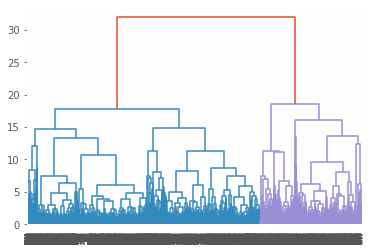

In [34]:
dend=dendrogram(linkage(decomp_2, method='ward'))
plt.show();

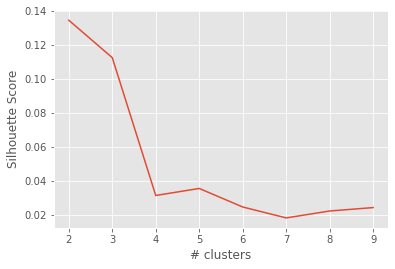

In [51]:
sil_scores = []
for i in range(2,10):
    ag=agglo(n_clusters=i, affinity='euclidean',linkage='ward')
    clusters=ag.fit_predict(decomp_2)
    sil_scores.append(silhouette_score(decomp_2, clusters))
    
fig = sns.lineplot(x=np.arange(2,10), y=sil_scores)
fig.set(ylabel='Silhouette Score', xlabel='# clusters');

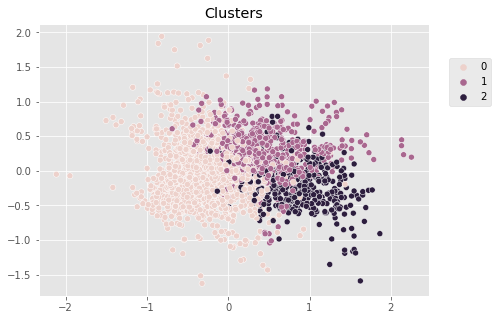

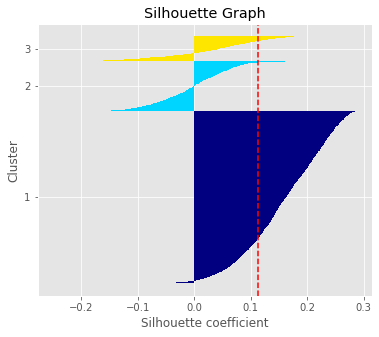

In [42]:
#ag = BisectingKMeans(n_clusters=3, random_state=0).fit(scaled)
ag=agglo(n_clusters=3, affinity='euclidean',linkage='ward')
clusters=ag.fit_predict(decomp_2)

plt.figure(figsize=(7,5));
sns.scatterplot(x = decomp_2[:,0], y = decomp_2[:,1], hue=clusters);
plt.title('Clusters');
plt.legend(loc=(1.05,0.7));


#Graphing Silhouette
labels=np.unique(clusters)
n_clusters=labels.shape[0]
sils=silhouette_samples(decomp_2,clusters,metric='euclidean')
y_ax_lower, y_ax_upper=0, 0
yticks=[]
plt.figure(figsize=(6,5))
for i,c in enumerate(labels):
    cluster_sil=sils[clusters==c]
    cluster_sil.sort()
    y_ax_upper +=len(cluster_sil)
    color=cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            cluster_sil, height=1.0,
            edgecolor='none', color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower+=len(cluster_sil)
silhouette_avg=np.mean(sils)
plt.axvline(silhouette_avg,color='red', linestyle='--')
plt.yticks(yticks,labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Graph');
plt.show();